### Github Link: https://github.com/GENRATECODE/Replication_of_McDonalds_Case_Study_in_Python

# Abhay Swarnkar

# Step 1 : Deciding (not) to Segment

McDonald’s can take the position that it caters to the entire market and that
there is no need to understand systematic differences across market segments.
Alternatively, McDonald’s can take the position that, despite their market power,
there is value in investigating systematic heterogeneity among consumers and
harvest these differences using a differentiated marketing strategy.

## Step 2: Specifying the Ideal Target Segment 

### 1- Critical Criteria for target segments:
  * `Homogeneity` : Members share key characteristics
  * `Distinctiveness`: Notable differences from other segments.
  * `Scale` :Size justifies a tailored marketing approach.
  * `Alignment`:Openness to fast-food dining, matching McDonald's strengths.
  * `Identifiability`: Clearly distinguishable from other consumers.
  * `Reachability`:Accessible through targeted communication and distribution channels.
### 2 - Segment Attractiveness Criteria:
  * `Favorable Perception`: Positive view of McDonald's Brand.
  * `Dining Behavio`r: Reqularly eats out, with a perference for fast food.
  * `Inclination Towards Fast Food`: A likelihood to appreciate fast-food Offerings
### 3- Exploration of New Markets:
  * `Low Market Share Exploration`: Ventures into segments with low current market shares.
  *` Understanding Unfavorable Segments`: Identifies and comprehends reasons for low affinity.
  * `Perception Adjustment:`Seeks to modify perceptions in currently unfavorable segments.
### 4 -Effective Use of Fast Food Data Set:
  * `Limited Focus:`Data set centers on McDonald's brand image perceptions.
  * `Attractiveness Criteria Application:`Selection based on liking McDonald's and frequent consumption.
  * `Strategic Guidance:` Crucial input for Step 8, guiding precise target segment selection.

# Step 3 :  Data

## Dataset Overview:
    * Responses from 1453 adult Australian consumers.
    * Focus on perceptions of McDonald's across 11 attributes (e.g., YUMMY, FAST).
    * Attributes derived from a prior qualitative study.
## Attribute Responses:
    * Binary responses (YES{1}/NO{0}) indicating whether consumers believe McDonald's possesses each attribute.
    * Attributes include YUMMY, CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE, HEALTHY, and DISGUSTING.
## Demographic Information:
    * Collected data on respondents' AGE and GENDER{Female-1,male-0}.
## Limitations and Potential Enhancements:
   * Lacks additional details crucial for market segmentation (e.g dining-out behavior, information channel usage)
   * In a real market segmentation study, collecting such information would provide a more detailed description of each market segment.
    

#  Step 4: Exploring Data 

First we explore the key characteristics of the data set by loading the data set and
inspecting basic features such as the variable names, the sample size, and the first
three rows of the data:

In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score


In [102]:
mcdonalds=pd.read_csv("resources/McDonalds_Case_Study/mcdonalds.csv")

In [4]:
mcdonalds.head(3) # first three row
df=mcdonalds
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [5]:
mcdonalds.shape # dimension

(1453, 15)

In [6]:
for i in mcdonalds.columns:
    if pd.api.types.is_string_dtype(mcdonalds[i]):
        print(mcdonalds[i].value_counts())
        print("-"*100)

yummy
Yes    803
No     650
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
convenient
Yes    1319
No      134
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
spicy
No     1317
Yes     136
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
fattening
Yes    1260
No      193
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
greasy
Yes    765
No     688
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
fast
Yes    1308
No      145
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
cheap
Yes    870
No     583
Name: count, dtype: int64

change
Yes (True)--> 1
NO(False)-->0

## convert string into numeric 

In [7]:
col=mcdonalds.columns
len(col)

15

In [15]:
mcdonalds.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [16]:
non_numeric=list()

In [17]:
for i in mcdonalds.columns:
    if not pd.api.types.is_numeric_dtype(mcdonalds[i]):
        non_numeric.append(i)
non_numeric,len(non_numeric)

(['yummy',
  'convenient',
  'spicy',
  'fattening',
  'greasy',
  'fast',
  'cheap',
  'tasty',
  'expensive',
  'healthy',
  'disgusting',
  'Like',
  'VisitFrequency',
  'Gender'],
 14)

In [18]:
removesss=["VisitFrequency","Gender","Like"]

In [19]:
for i in removesss:
    non_numeric.remove(i)

In [104]:
import pandas as pd

# Assuming df is your DataFrame
# Assuming columns 'YUMMY' to 'DISGUSTING' contain 'YES' or 'NO'

# Define the mapping function
def map_yes_no(value):
    return 1 if value == 'Yes' else 0

# Create a list of columns to be converted
columns_to_convert = non_numeric

# Use the map function for each column in the list
for column in columns_to_convert:
    mcdonalds[column] = mcdonalds[column].map(map_yes_no)

# Check the resulting DataFrame
mcdonalds.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [21]:
mcdonalds.to_csv("half_preprocessing_mcdo.csv",index=False)

In [27]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1453 non-null   int64
 1   convenient      1453 non-null   int64
 2   spicy           1453 non-null   int64
 3   fattening       1453 non-null   int64
 4   greasy          1453 non-null   int64
 5   fast            1453 non-null   int64
 6   cheap           1453 non-null   int64
 7   tasty           1453 non-null   int64
 8   expensive       1453 non-null   int64
 9   healthy         1453 non-null   int64
 10  disgusting      1453 non-null   int64
 11  Like            1453 non-null   int64
 12  Age             1453 non-null   int64
 13  VisitFrequency  1453 non-null   int64
 14  Gender          1453 non-null   int64
dtypes: int64(15)
memory usage: 170.4 KB


In [28]:
mcdonalds.describe().T

,count,mean,std,min,25%,50%,75%,max
yummy,1453.0,0.552650,0.497391,0.0,0.0,1.0,1.0,1.0
convenient,1453.0,0.907777,0.289440,0.0,1.0,1.0,1.0,1.0
spicy,1453.0,0.093599,0.291371,0.0,0.0,0.0,0.0,1.0
fattening,1453.0,0.867171,0.339506,0.0,1.0,1.0,1.0,1.0
greasy,1453.0,0.526497,0.499469,0.0,0.0,1.0,1.0,1.0
fast,1453.0,0.900206,0.299828,0.0,1.0,1.0,1.0,1.0
cheap,1453.0,0.598761,0.490318,0.0,0.0,1.0,1.0,1.0
tasty,1453.0,0.644184,0.478925,0.0,0.0,1.0,1.0,1.0
expensive,1453.0,0.357880,0.479542,0.0,0.0,0.0,1.0,1.0
healthy,1453.0,0.198899,0.399309,0.0,0.0,0.0,0.0,1.0


In [29]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,1
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,1
3,1,1,0,1,1,1,1,1,0,0,1,4,69,1,1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,2,0


In [74]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame with columns 'yummy' to 'disgusting'
columns_to_convert = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
                       'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

# Convert to matrix and numeric representation
MD_x = (df[columns_to_convert] == 'Yes').astype(int).values

# Calculate and round column means
col_means = np.round(np.mean(MD_x, axis=0), 2)

# Display the results
for col, mean in zip(columns_to_convert, col_means):
    print(f'{col}: {mean}')


yummy: 0.0
convenient: 0.0
spicy: 0.0
fattening: 0.0
greasy: 0.0
fast: 0.0
cheap: 0.0
tasty: 0.0
expensive: 0.0
healthy: 0.0
disgusting: 0.0


In [30]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,0,1
1,1,1,0,1,1,1,1,1,1,0,0,2,51,0,1
2,0,1,1,1,1,1,0,1,1,1,0,1,62,0,1
3,1,1,0,1,1,1,1,1,0,0,1,4,69,1,1
4,0,1,0,1,1,1,1,0,0,1,0,2,49,2,0


In [33]:
# Assuming mcdonalds is your DataFrame in Python (replace it with your actual DataFrame)
# If your DataFrame has mixed types, you may need to adjust the code accordingly.

# Subset the DataFrame to include only the first 11 columns
MD_x = mcdonalds.iloc[:, 0:11].copy()
# Calculate and print rounded column means
column_means = np.round(MD_x.mean(), 2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_df = sc.fit_transform(MD_x)
from sklearn.decomposition import PCA
pca = PCA(n_components=11)
princ_compo = pca.fit_transform(sc_df)
pca_df = pd.DataFrame(data=princ_compo, columns=["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6", "PCA7", "PCA8", "PCA9", "PCA10", "PCA11",])
pca_df.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


In [36]:
from sklearn.decomposition import PCA
import numpy as np

# Assuming MD.x is your data matrix in Python (replace it with your actual data)
# MD.x should be a 2D array where rows are observations and columns are variables/features.

# Create an instance of PCA
pca = PCA()

# Fit the PCA model to your data
MD_pca = pca.fit_transform(MD_x)

# Print the summary
print("Proportion of Variance:")
print(np.cumsum(pca.explained_variance_ratio_))
print("\nSummary of PCA:")
print(pca)

# If you want to print a summary similar to R's summary(MD.pca)
print("\nSummary of PCA (similar to Python's summary):")
print("Standard deviations (1, ..., p):", pca.singular_values_)
print("Rotation (loadings) matrix:")
print(pca.components_)
print("Center of mass (mean) vector:")
print(pca.mean_)


Proportion of Variance:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]

Summary of PCA:
PCA()

Summary of PCA (similar to Python's summary):
Standard deviations (1, ..., p): [28.84746118 23.14716582 19.22858381 15.19626736 12.85685762 11.82305052
 11.03895052 10.48355462 10.10742431  9.48214684  9.02721076]
Rotation (loadings) matrix:
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -

In [37]:
# Print the factor loadings rounded to one decimal place
print("Factor Loadings:")
print(np.round(pca.components_, 1))

# Print the standard deviations
print("Standard deviations (1, .., p={}):".format(len(pca.components_)))
print(np.round(pca.singular_values_, 1))

Factor Loadings:
[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]
Standard deviations (1, .., p=11):
[28.8 23.1 19.2 15.2 12.9 11.8 11.  10.5 10.1  9.5  9. ]


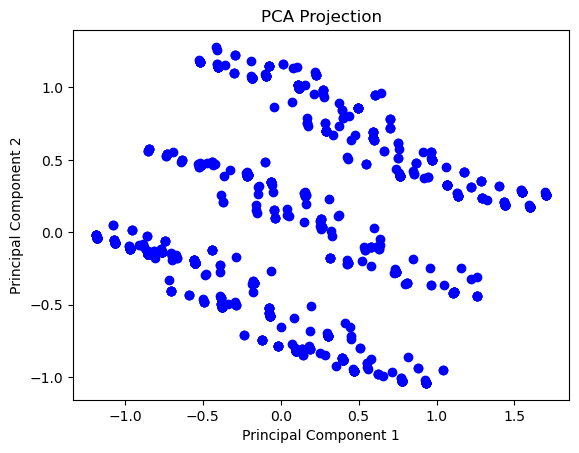

In [41]:
# Plot the PCA projection
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color="blue")
plt.title("PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

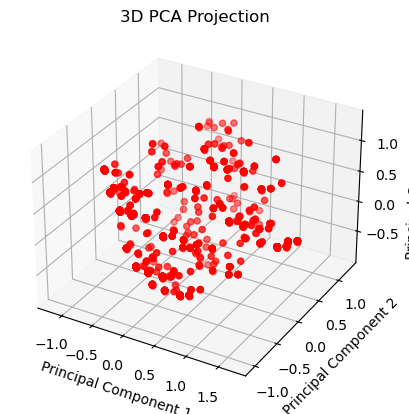

In [40]:
# If you want to plot 3D projection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(MD_pca[:, 0], MD_pca[:, 1], MD_pca[:, 2], c="red")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.title("3D PCA Projection")
plt.show()

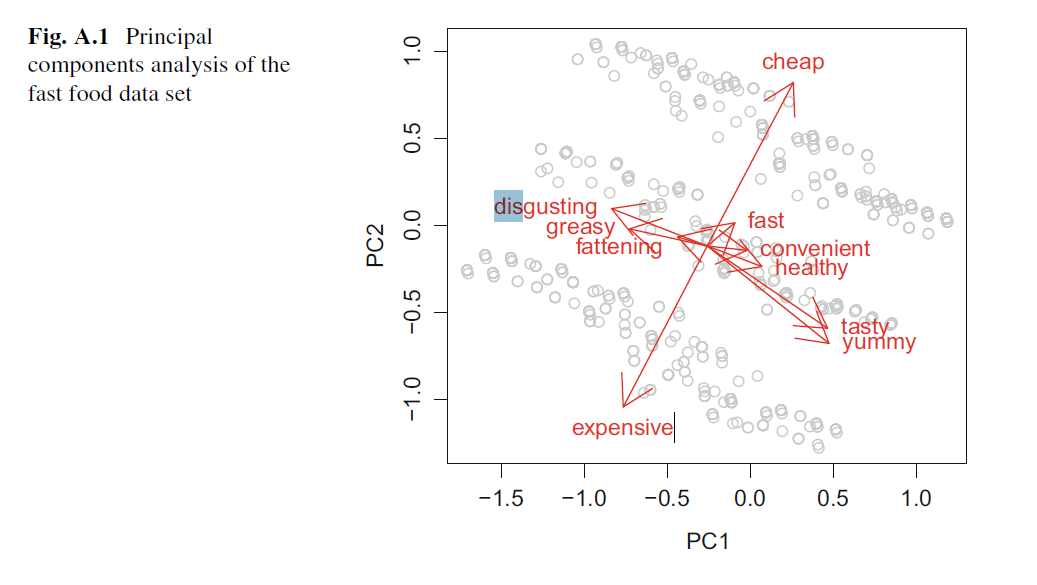

The attributes CHEAP and
EXPENSIVE play a key role in the evaluation ofMcDonald’s, and these two attributes
are assessed quite independently of the others. The remaining attributes align
with what can be interpreted as positive versus negative perceptions: FATTENING,
DISGUSTING and GREASY point in the same direction in the perceptual chart,
indicating that respondents who view McDonald’s as FATTENING, DISGUSTING are
also likely to view it as GREASY. In the opposite direction are the positive attributes
FAST, CONVENIENT, HEALTHY, as well as TASTY and YUMMY. The observations
along the EXPENSIVE versus CHEAP axis cluster around three values: a group of
consumers at the top around the arrow pointing to CHEAP, a group of re at the bottom around the arrow pointing to EXPENSIVE, and a group of respondents
in the middle.
These initial exploratory insights represent valuable information for segment
extraction. Results indicate that some attributes are strongly related to one another,
and that the price dimension may be critical in differentiating between groups of
consumers.spondents

# Step 5: Extracting Segments

Step 5 is where we extract segments. To illustrate a range of extraction techniques,
we subdivide this step into three sections. In the first section, we will use standard
`k-means analysis`. In the second section, we will use finite mixtures of binary
distributions. In the third section, we will use finite mixtures of regressions.

###  Using K -means

We calculate solutions for two to eight market segments using standard k-means
analysis with ten random restarts (argument nrep). We then relabel segment
numbers such that they are consistent across segmentations.

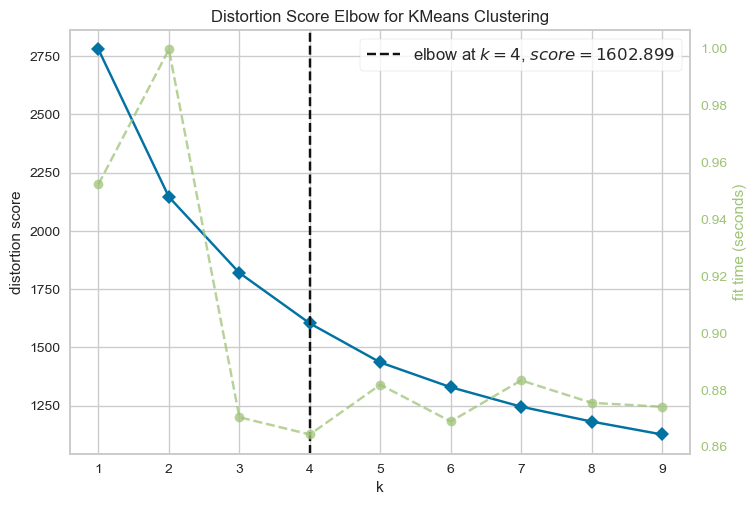

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans_model = KMeans()
visualizer = KElbowVisualizer(kmeans_model, k=(1,10))
visualizer.fit(MD_x)        
visualizer.show()     
     

In [84]:

kmeans = KMeans(4)
kmeans.fit_predict(sc_df)
pca_df_kmeans = pd.concat([pca_df, pd.DataFrame({'cluster':kmeans.labels_})], axis=1)
     

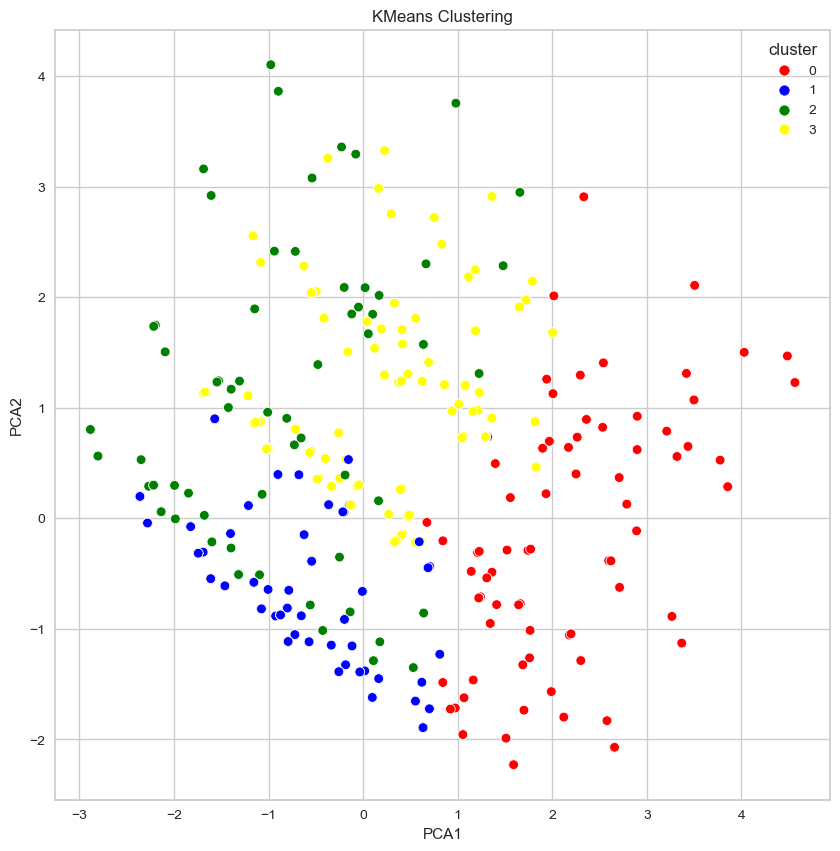

In [85]:

plt.figure(figsize=(10,10))
dia = sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_df_kmeans, palette=['red', 'blue', 'green', 'yellow'])
plt.title("KMeans Clustering")
plt.show()

In [89]:
kmeans = KMeans(4)
kmeans.fit_predict(sc_df)
pca_df_kmeans1 = pd.concat([MD_x,pd.DataFrame({'cluster':kmeans.labels_})], axis=1)

<Axes: xlabel='cluster', ylabel='count'>

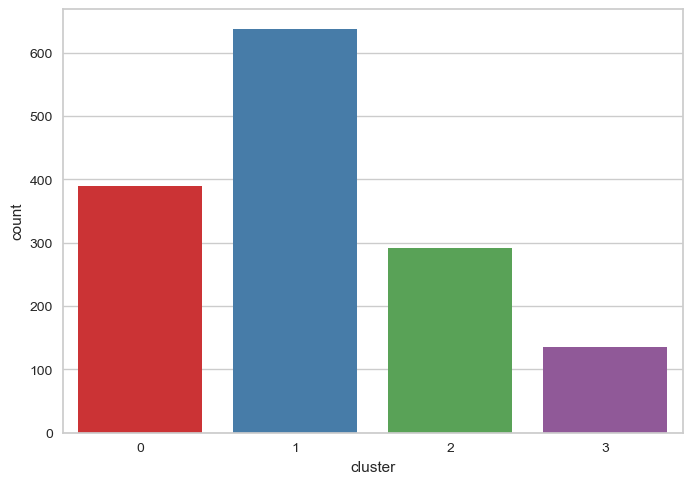

In [90]:
sns.countplot(x ='cluster', data = pca_df_kmeans1, palette = "Set1")
     

# Step 6: Profiling Segments
The core of the segmentation analysis is complete: market segments have been
extracted. Now we need to understand what the four-segment k-means solution
means. The first step in this direction is to create a segment profile plot. The segment
profile plot makes it easy to see key characteristics of each market segment. It also
highlights differences between segments.


In [94]:
cluster1 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==0]
cluster2 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==1]
cluster3 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==2]
cluster4 = pca_df_kmeans1[pca_df_kmeans1["cluster"]==3]

In [126]:
cluster1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
1,1,1,0,1,1,1,1,1,1,0,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0
9,1,1,0,1,1,1,0,1,1,0,0,0
11,1,1,0,1,1,1,0,1,1,0,1,0
14,0,1,0,1,0,1,0,0,1,0,0,0


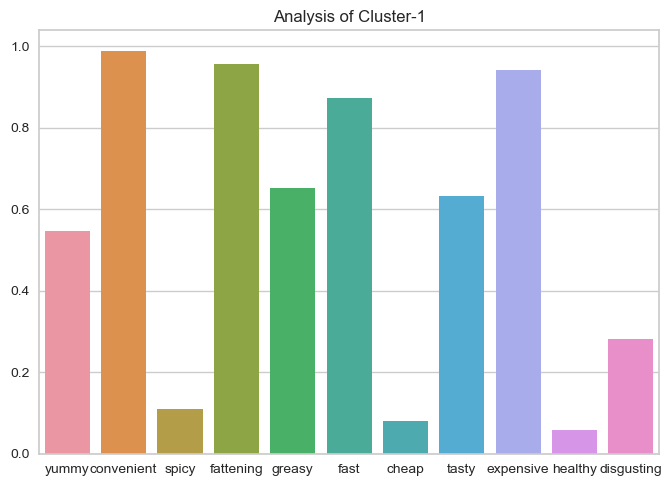

In [127]:

dia = sns.barplot(data=cluster1[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-1')
plt.show()

In [128]:
cluster2.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
0,0,1,0,1,0,1,1,0,1,0,0,1
3,1,1,0,1,1,1,1,1,0,0,1,1
4,0,1,0,1,1,1,1,0,0,1,0,1
5,1,1,0,1,0,1,1,1,0,0,0,1
7,1,1,0,1,1,1,1,1,0,0,0,1


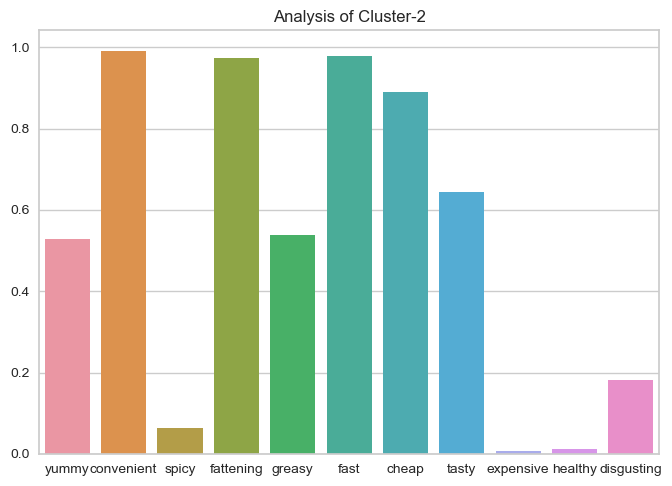

In [129]:
dia = sns.barplot(data=cluster2[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-2')
plt.show()

In [130]:
cluster3.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
6,1,1,1,1,0,1,0,1,1,1,0,2
13,1,1,0,1,0,1,0,1,1,1,0,2
17,1,1,0,0,1,1,0,1,0,0,0,2
24,1,1,0,1,0,1,1,1,0,1,0,2
27,0,1,0,1,1,1,0,1,0,1,0,2


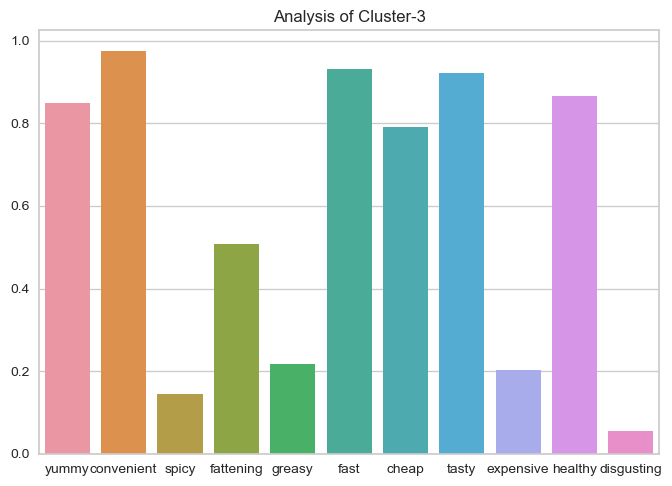

In [131]:

dia = sns.barplot(data=cluster3[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-3')
plt.show()
     

In [132]:
cluster4.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster
8,0,0,0,1,1,0,0,0,1,0,1,3
18,0,0,0,1,1,1,1,0,1,0,1,3
38,0,0,0,1,1,1,1,0,0,0,1,3
39,0,0,0,1,1,1,0,0,1,0,1,3
40,1,0,0,1,0,0,0,1,1,0,0,3


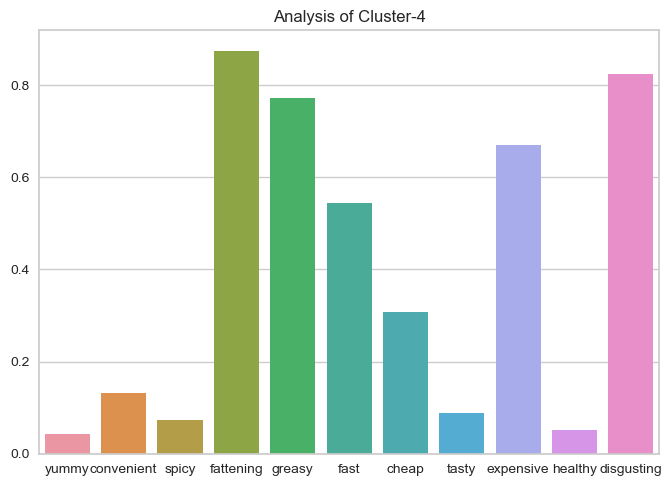

In [133]:

dia = sns.barplot(data=cluster4[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']], ci=None)
plt.title('Analysis of Cluster-4')
plt.show()

(`Scatterplot with cluster coloring `)looks familiar because we have already used principal components
analysis to explore data in Step 4). Here, the centres of each market
segment are added using black circles containing the segment number. In addition,
observations are coloured to reflect segment membership.
As can be seen, segments 1 and 4 both viewMcDonald’s as cheap, with members
of segment 4 holding – in addition – some positive beliefs and members of segment 1
associating McDonald’s primarily with negative attributes. At the other end of the
price spectrum, segments 2 and 3 agree that McDonald’s is not cheap, but disagree
on other features with segment 2 holding a less flattering view than members of
segment 3.
At the end of Step 6 McDonald’s managers have a good understanding of the
nature of the four market segments in view of the information that was used to create
these segments. Apart from that, they know little about the segments. Learning more
about them is the key aim of Step 7.

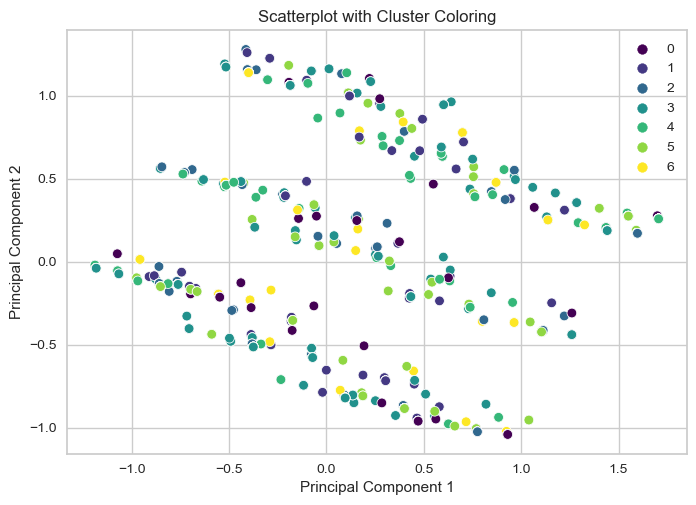

In [100]:
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=cluster_labels, palette='viridis', legend='full')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Scatterplot with Cluster Coloring")

# Show the plot
plt.show()

# Step 7: Describing Segments

In [105]:
data_new= pd.concat([mcdonalds,pd.DataFrame({'cluster':kmeans.labels_})],axis=1)
data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,1


In [106]:
data_new['VisitFrequency'].value_counts()

VisitFrequency
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: count, dtype: int64

In [109]:
data_new["VisitFrequency"]= data_new["VisitFrequency"].replace({'Never':0, 'Once a year':1, 'Every three months':2, 'Once a month':3, 'Once a week':4, 'Never':5, 'More than once a week':6})
data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,2,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,2,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,4,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,3,Male,1


In [110]:
data_new['Like'].value_counts()

Like
+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: count, dtype: int64

In [111]:
data_new["Like"]= data_new["Like"].replace({'I hate it!-5':0, '-4':1, '-3':2, '-2':3, '-1':4, '0':5, '+1':6, '+2':7, '+3':8, '+4':9, 'I love it!+5':10})
data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,Female,1
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,Male,1


In [112]:

data_new['Gender'].value_counts()

Gender
Female    788
Male      665
Name: count, dtype: int64

In [114]:
data_new["Gender"]= data_new["Gender"].replace({'Female':0, 'Male':1})
data_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster
0,0,1,0,1,0,1,1,0,1,0,0,2,61,2,0,1
1,1,1,0,1,1,1,1,1,1,0,0,7,51,2,0,0
2,0,1,1,1,1,1,0,1,1,1,0,6,62,2,0,0
3,1,1,0,1,1,1,1,1,0,0,1,9,69,4,0,1
4,0,1,0,1,1,1,1,0,0,1,0,7,49,3,1,1


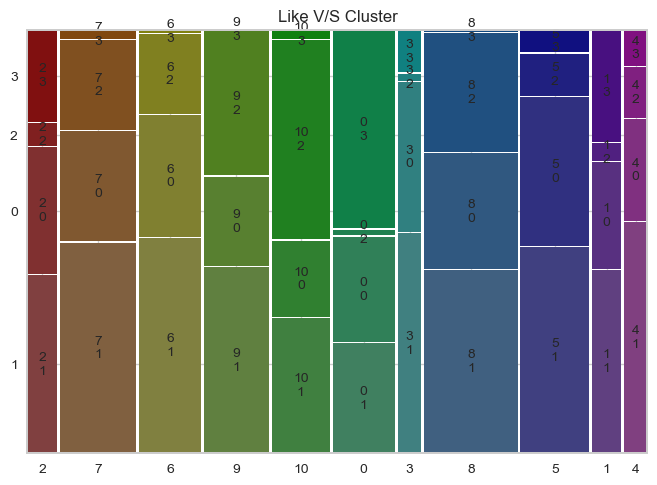

In [116]:

from statsmodels.graphics.mosaicplot import mosaic
mosaic(data_new, ['Like','cluster'],title='Like V/S Cluster')
plt.show()
     

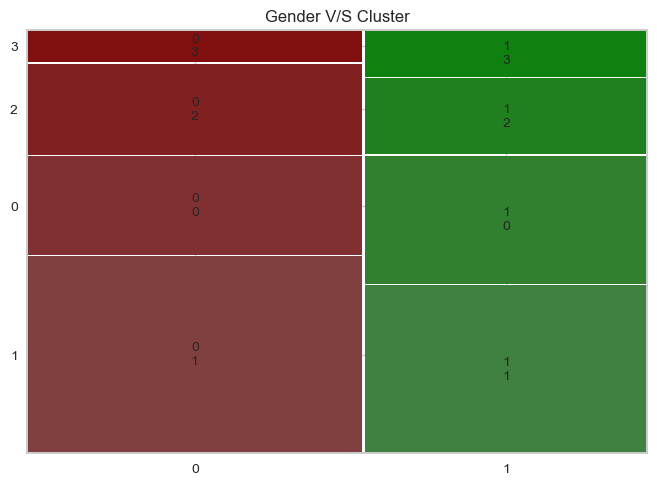

In [117]:
mosaic(data_new, ['Gender','cluster'],title='Gender V/S Cluster')
plt.show()


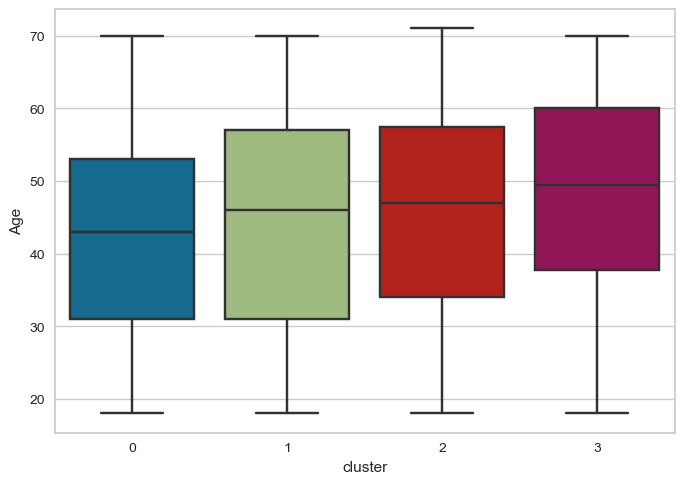

In [118]:

sns.boxplot(x=data_new['cluster'], y=data_new['Age'])
plt.show()
     

# Step 8: Selecting the Target Segments

In [119]:

from sklearn.model_selection import train_test_split
X = data_new.drop(['cluster'],axis=1)
Y = data_new[['cluster']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [120]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
model = classifier.fit(X, Y)

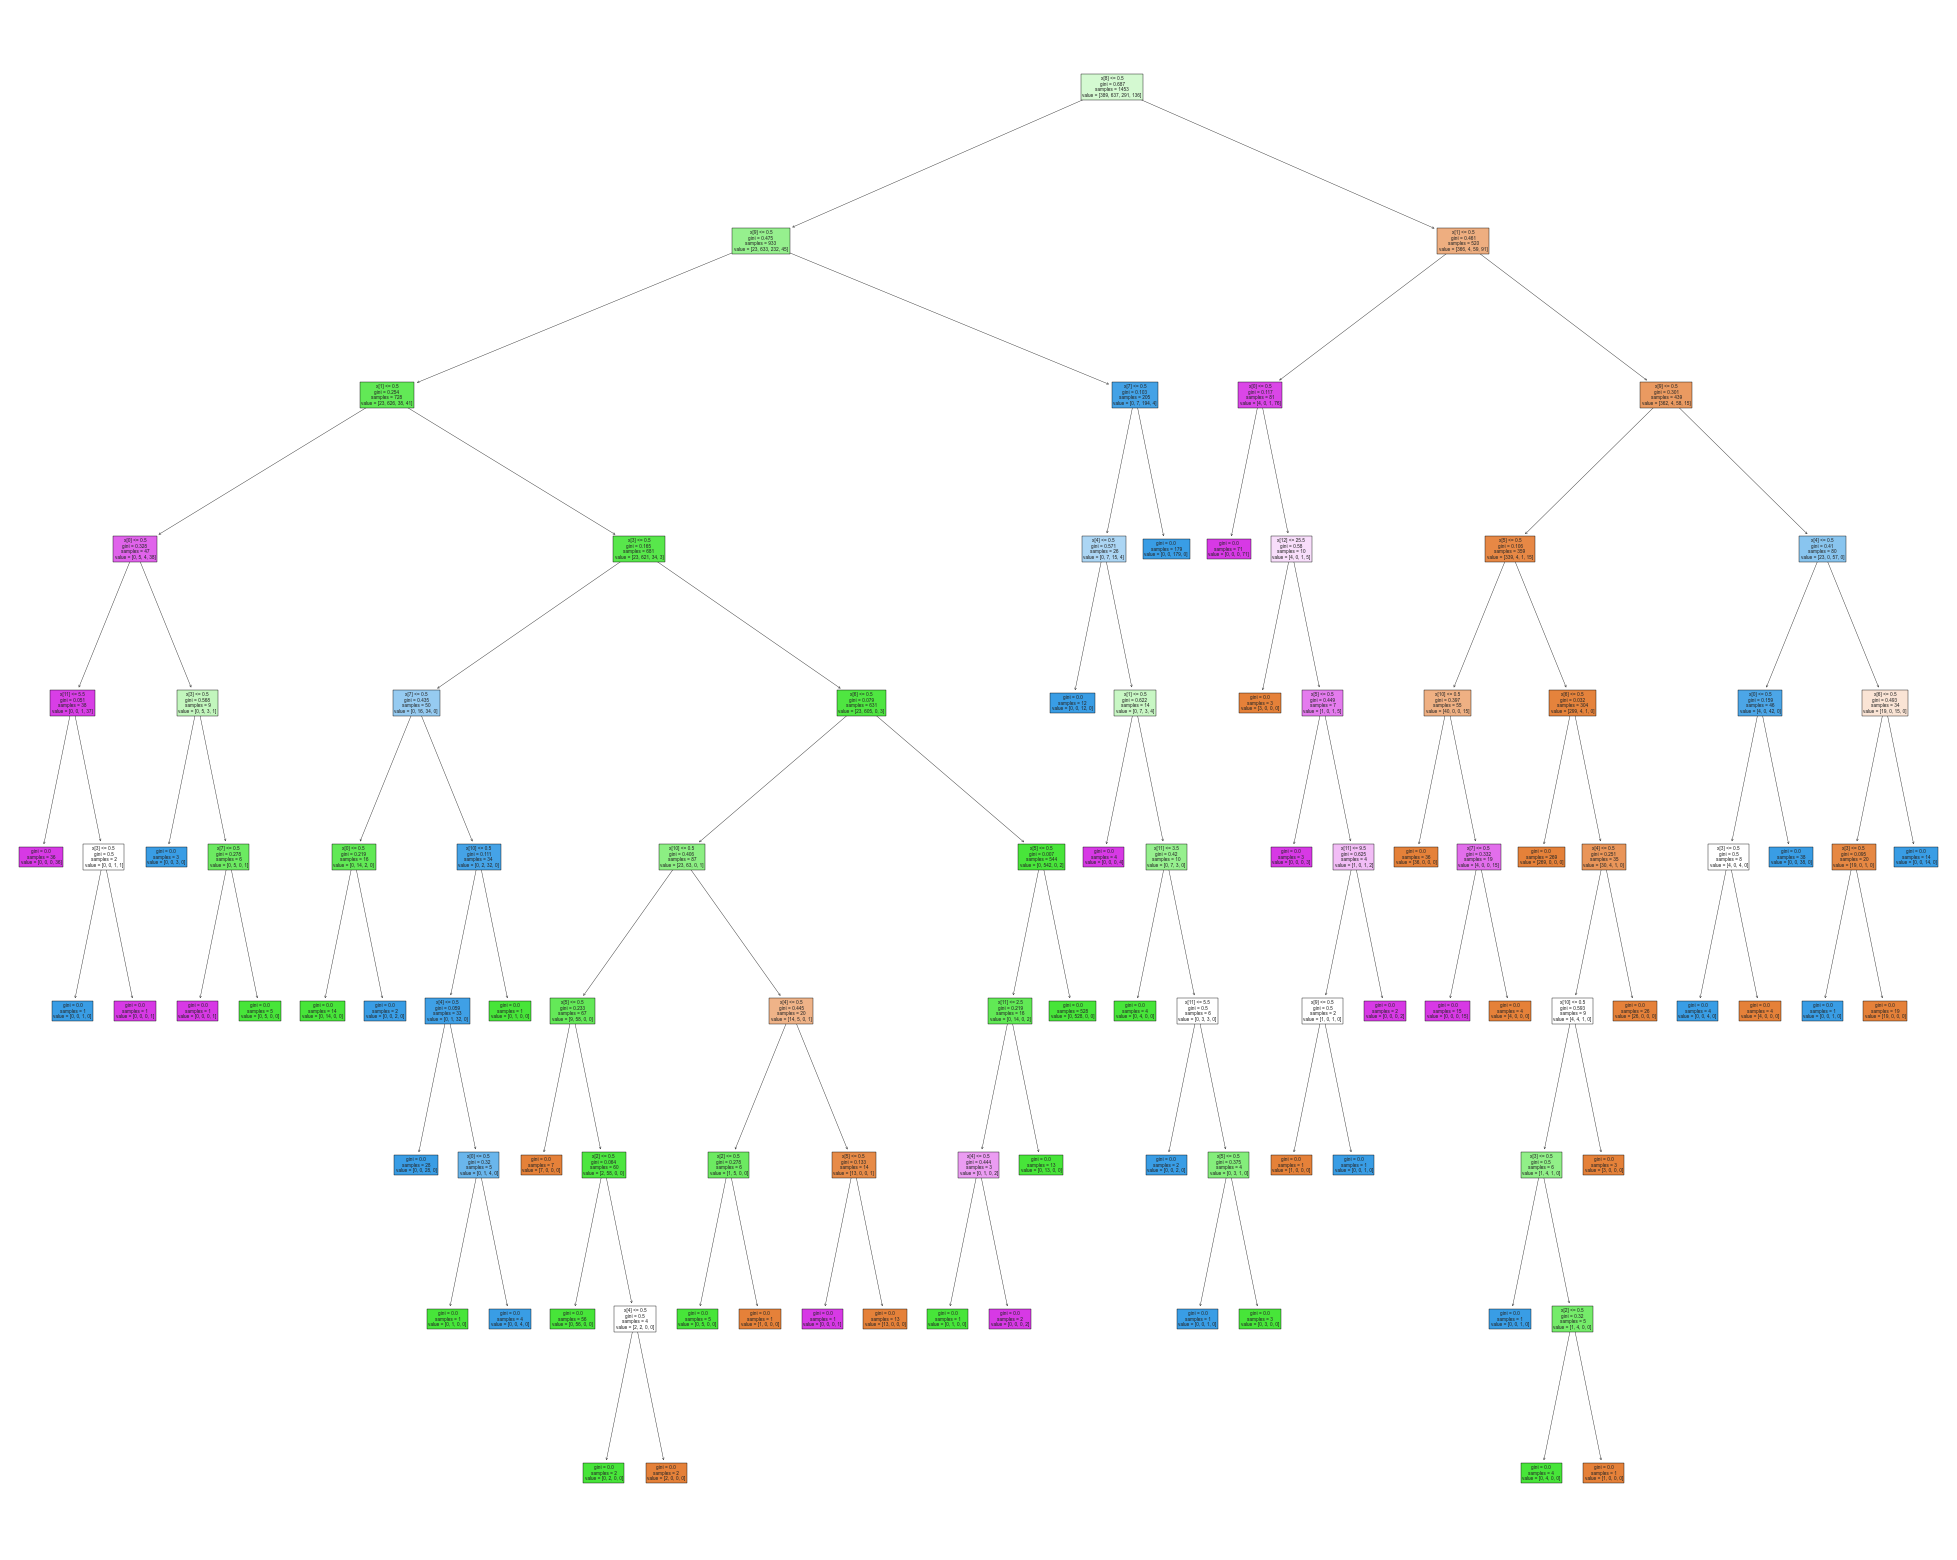

In [121]:

from sklearn import tree
dia = plt.figure(figsize=(25,20))
_ = tree.plot_tree(classifier, filled=True)

# Step 9: Custormising the Marketing Mix

the marketing mix is designed. If, for example, McDonald’s managers
decide to focus on segment 3 (young customers who like McDonald’s, think the
food is yummy and tasty, but perceive it as pretty expensive), they could choose to
offer a MCSUPERBUDGET line to cater specifically to the price expectations of this
segment (4Ps: Price). The advantage of such an approach might be that members
of segment 3 develop to become loyal customers who, as they start earning more
money, will not care about the price any more and move to the regular McDonald’s
range of products. To not cannibalise the main range, the product features of the
MCSUPERBUDGET range would have to be distinctly different (4Ps: Product). Next,
communication channels would have to be identified which are heavily used by
members of segment 3 to communicate the availability of the MCSUPERBUDGET
line (4Ps: Promotion). Distribution channels (4Ps: Place) would have to be the same
given that all McDonald’s food is sold in McDonald’s outlets. But McDonald’s
management could consider having a MCSUPERBUDGET lane where the wait in the
queue might be slightly longer in an attempt not to cannibalise the main product line.

# Step 10: Evaluation and Monitoring

In [122]:
classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
     

In [124]:
import pickle
filename = 'classifier.pkl'
pickle.dump(classifier, open(filename, 'wb'))

#again loading the stored model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result*100,'% Accuracy')

97.59450171821305 % Accuracy
